In [1]:
from scipy.io import loadmat

## Read the data.
data_path = "/data/shared/TMT-Plus-Bangladesh/Data/HSI/"
img = loadmat(data_path + 'indian_pines_corrected.mat')['indian_pines_corrected']
gt = loadmat(data_path + 'indian_pines_gt.mat')['indian_pines_gt']

# Groundtruth classes for the Indian Pines scene and their respective samples number
# #	Class	Samples
# 1	Alfalfa	46
# 2	Corn-notill	1428
# 3	Corn-mintill	830
# 4	Corn	237
# 5	Grass-pasture	483
# 6	Grass-trees	730
# 7	Grass-pasture-mowed	28
# 8	Hay-windrowed	478
# 9	Oats	20
# 10	Soybean-notill	972
# 11	Soybean-mintill	2455
# 12	Soybean-clean	593
# 13	Wheat	205
# 14	Woods	1265
# 15	Buildings-Grass-Trees-Drives	386
# 16	Stone-Steel-Towers	93

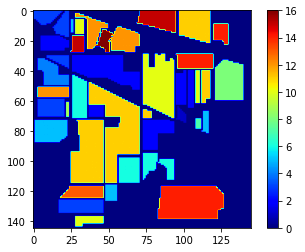

In [4]:
import matplotlib.pyplot as plt

plt.imshow(gt, cmap='jet')
plt.colorbar()

In [5]:
nr,nc,nb = img.shape
print(nr,nc,nb)

145 145 200


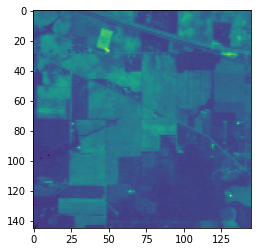

In [7]:
#Some hyperspectral image bands

band = 10
one_band = img[:,:,band-1]
plt.imshow(one_band)

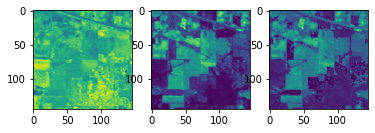

In [8]:
bands = (60,30,20)

f, axarr = plt.subplots(1,3)
axarr[0].imshow(img[:,:,bands[0]-1])
axarr[1].imshow(img[:,:,bands[1]-1])
axarr[2].imshow(img[:,:,bands[2]-1])



In [9]:
import numpy as np

def stack_rgb(img,bands):
    
    red = img[:,:,bands[0]-1]
    green = img[:,:,bands[1]-1]
    blue = img[:,:,bands[2]-1]
    
    stackedRGB = np.stack((red,green,blue),axis=2)
    
    return stackedRGB


img_rgb = stack_rgb(img,bands)
img_rgb.shape



(145, 145, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


7307

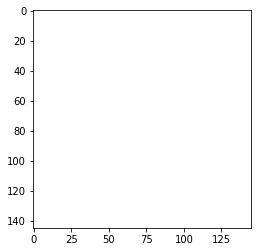

In [11]:
plt.imshow(img_rgb)
np.max(img_rgb)

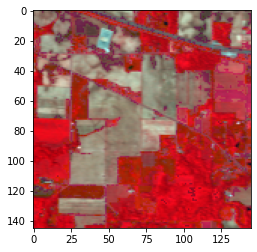

In [12]:
import numpy as np

def MyNormalize(img_i,sigma):
    nr,nc,nb = img_i.shape
    img_n = np.zeros(shape=(nr,nc,nb))
    for i in range(0,nb):
        one_band = img_i[:,:,i]
        mi = np.min(one_band)
        ma = np.max(one_band)
        one_band = (one_band-mi)/(ma-mi+np.finfo(float).eps)
        img_n[:,:,i] = sigma*one_band
    return img_n

plt.imshow(MyNormalize(img_rgb,1))

In [13]:
X = img.reshape((nr*nc, nb))
X.shape

(21025, 200)

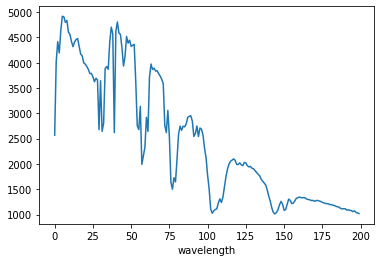

In [15]:
xi = X[1000,:]
plt.plot(xi)
plt.xlabel('wavelength')
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

from sklearn import decomposition
pca = decomposition.PCA(n_components=3)
pca.fit(X_std)
X_pca = pca.transform(X_std)
X_pca.shape

(21025, 3)

In [17]:
img_pca = X_pca.reshape((nr,nc,3))
img_pca.shape

(145, 145, 3)

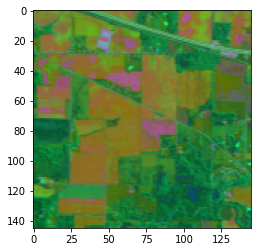

In [18]:
#Pseudocolor image extracted through PCA analysis
plt.imshow(MyNormalize(img_pca,1))

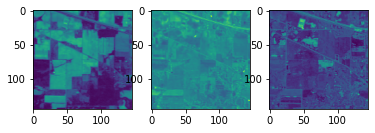

In [19]:
f, axarr = plt.subplots(1,3)
axarr[0].imshow(img_pca[:,:,0])
axarr[1].imshow(img_pca[:,:,1])
axarr[2].imshow(img_pca[:,:,2])


In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X)

from sklearn import cluster
clus_model = cluster.KMeans(n_clusters=16)
clus_model.fit(X)

KMeans(n_clusters=16)

In [21]:
lab = clus_model.labels_
print(lab.shape)
class_map = lab.reshape((nr,nc,1))
class_map.shape

(21025,)


(145, 145, 1)

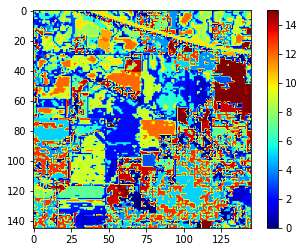

In [22]:
plt.imshow(class_map, cmap='jet')
plt.colorbar()

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_pca)

from sklearn import cluster
clus_model = cluster.KMeans(n_clusters=16)
clus_model.fit(X_pca)

KMeans(n_clusters=16)

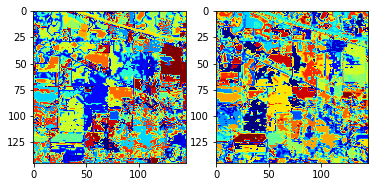

In [24]:
lab_pca = clus_model.labels_
class_map_pca = lab_pca.reshape((nr,nc,1))

f, axarr = plt.subplots(1,2)
axarr[0].imshow(class_map, cmap='jet')
axarr[1].imshow(class_map_pca, cmap='jet')



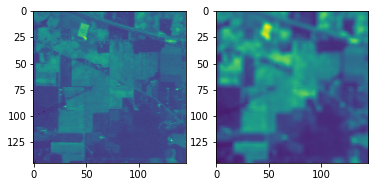

In [27]:
# smoothing
import cv2
img_s = np.zeros(shape=(nr,nc,nb))
band = 10
sigma = 5
img_s[:,:,band-1] = cv2.blur(img[:,:,band-1],(sigma,sigma))
f, axarr = plt.subplots(1,2)
axarr[0].imshow(img[:,:,band-1])
axarr[1].imshow(img_s[:,:,band-1])

In [28]:
def MyFiltering(img,sigma):
    nr,nc,nb = img.shape
    for i in range(0,nb):
        one_band = img[:,:,i]
        one_band = cv2.blur(one_band,(sigma,sigma))
        img[:,:,i] = one_band
    return img

sigma = 5
img_s = MyFiltering(img,sigma)
X_s = img_s.reshape((nr*nc, nb))
X_s.shape

(21025, 200)

In [29]:
from sklearn.preprocessing import StandardScaler
X_s_std = StandardScaler().fit_transform(X_s)

from sklearn import decomposition
pca = decomposition.PCA(n_components=3)
pca.fit(X_s_std)
X_s_pca = pca.transform(X_s_std)

img_s_pca = X_s_pca.reshape((nr,nc,3))
img_s_pca.shape

(145, 145, 3)

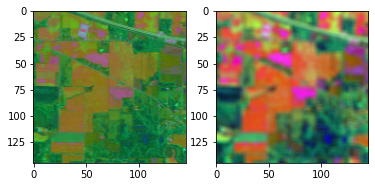

In [30]:
#Pseudocolor image extracted through PCA analysis
f, axarr = plt.subplots(1,2)
axarr[0].imshow(MyNormalize(img_pca,1))
axarr[1].imshow(MyNormalize(img_s_pca,1))



In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_s)

from sklearn import cluster
clus_model = cluster.KMeans(n_clusters=16)
clus_model.fit(X_s)

lab_s = clus_model.labels_
class_map_s = lab_s.reshape((nr,nc,1))

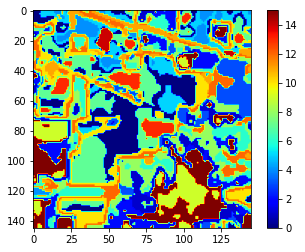

In [32]:
plt.imshow(class_map_s, cmap='jet')
plt.colorbar()

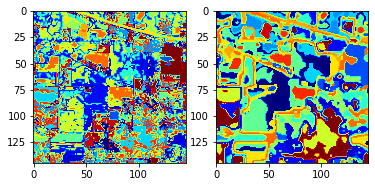

In [33]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(class_map, cmap='jet')
axarr[1].imshow(class_map_s, cmap='jet')

